In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [8]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # 1st wave
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20 )) # 2nd wave
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # some noise
    return series[..., np.newaxis].astype(np.float32)

In [9]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

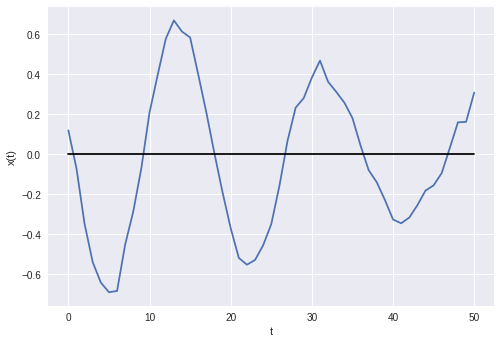

In [18]:
plt.plot(range(n_steps + 1), series[0])
plt.plot(range(n_steps + 1), [0] * (n_steps + 1), color="k")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

In [19]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [20]:
# baseline metrics
# - naively using the last value as the predicted value
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020243855

# fully connected network

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [23]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 197us/sample - loss: 0.0678 - val_loss: 0.0357
Epoch 2/20
7000/7000 [==============================] - 0s 57us/sample - loss: 0.0259 - val_loss: 0.0178
Epoch 3/20
7000/7000 [==============================] - 0s 57us/sample - loss: 0.0139 - val_loss: 0.0106
Epoch 4/20
7000/7000 [==============================] - 0s 58us/sample - loss: 0.0093 - val_loss: 0.0081
Epoch 5/20
7000/7000 [==============================] - 0s 59us/sample - loss: 0.0076 - val_loss: 0.0071
Epoch 6/20
7000/7000 [==============================] - 0s 59us/sample - loss: 0.0068 - val_loss: 0.0064
Epoch 7/20
7000/7000 [==============================] - 0s 58us/sample - loss: 0.0062 - val_loss: 0.0060
Epoch 8/20
7000/7000 [==============================] - 0s 55us/sample - loss: 0.0057 - val_loss: 0.0056
Epoch 9/20
7000/7000 [==============================] - 0s 55us/sample - loss: 0.0054 - val_loss: 0.0052
Epoch 

In [25]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 30us/sample - loss: 0.0037


0.0037297125104814766

# simple RNN

In [26]:
model = keras.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]) # single layer with a single neuron
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [27]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 830us/sample - loss: 0.0955 - val_loss: 0.0821
Epoch 2/20
7000/7000 [==============================] - 5s 691us/sample - loss: 0.0704 - val_loss: 0.0603
Epoch 3/20
7000/7000 [==============================] - 5s 695us/sample - loss: 0.0505 - val_loss: 0.0422
Epoch 4/20
7000/7000 [==============================] - 5s 694us/sample - loss: 0.0346 - val_loss: 0.0281
Epoch 5/20
7000/7000 [==============================] - 5s 698us/sample - loss: 0.0232 - val_loss: 0.0192
Epoch 6/20
7000/7000 [==============================] - 5s 696us/sample - loss: 0.0167 - val_loss: 0.0146
Epoch 7/20
7000/7000 [==============================] - 5s 707us/sample - loss: 0.0137 - val_loss: 0.0129
Epoch 8/20
7000/7000 [==============================] - 5s 710us/sample - loss: 0.0127 - val_loss: 0.0124
Epoch 9/20
7000/7000 [==============================] - 5s 709us/sample - loss: 0.0123 - val_loss: 0.012

In [28]:
model.evaluate(X_valid, y_valid)

# simple RNN did better than the naive approach but fully connected network outperformed 
# this RNN

2000/2000 [==============================] - 0s 181us/sample - loss: 0.0112


0.011193875849246979

# deep RNN

In [30]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(optimizer="adam", loss="mean_squared_error")

In [31]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 16s 2ms/sample - loss: 0.0212 - val_loss: 0.0043
Epoch 2/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0037 - val_loss: 0.0032
Epoch 3/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0033 - val_loss: 0.0030
Epoch 4/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0032 - val_loss: 0.0030
Epoch 5/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0031 - val_loss: 0.0028
Epoch 6/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0030 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0029 - val_loss: 0.0027
Epoch 1

# RNN with Dense layer

In [32]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
model.compile(optimizer="adam", loss="mean_squared_error")

In [35]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0208 - val_loss: 0.0050
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0042 - val_loss: 0.0038
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0036 - val_loss: 0.0034
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0034 - val_loss: 0.0031
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0035 - val_loss: 0.0039
Epoch 6/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0034 - val_loss: 0.0031
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0032 - val_loss: 0.0034
Epoch 8/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0032 - val_loss: 0.0029
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0032 - val_loss: 0.0030
Epoch 10/20
700

In [36]:
# forecasting 10 steps ahead
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
y_pred = X[:, n_steps:]

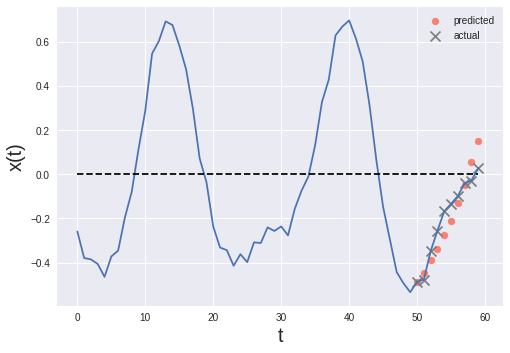

In [51]:
plt.plot(range(n_steps + 10), series[0])
plt.scatter(range(50, 60), y_pred, color="salmon", label="predicted")
plt.scatter(range(50, 60), series[0][-10:], marker="x", label="actual", color="gray", s=100)
plt.plot(range(0, 60), [0]*60, color="k", linestyle="--")
plt.xlabel("t", fontsize=20)
plt.ylabel("x(t)", fontsize=20)
plt.legend()
plt.show()

# RNN trained to predict all 10 next values

In [53]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [55]:
model = keras.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
model.compile(optimizer="adam", loss="mean_squared_error")

In [56]:
model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0757 - val_loss: 0.0327
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0268 - val_loss: 0.0242
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0203 - val_loss: 0.0186
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0173 - val_loss: 0.0155
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0149 - val_loss: 0.0134
Epoch 6/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0132 - val_loss: 0.0130
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0121 - val_loss: 0.0122
Epoch 8/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0120 - val_loss: 0.0148
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0110 - val_loss: 0.0110
Epoch 10/20
700

In [57]:
Y_pred = model.predict(X_new)